In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-on-an-entrance-examination/Student_Performance_on_an_Entrance_Examination.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
df = pd.read_csv("/kaggle/input/student-performance-on-an-entrance-examination/Student_Performance_on_an_Entrance_Examination.csv")

In [6]:
df.head()

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
2,male,OBC,OA,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                666 non-null    object
 1   Caste                 666 non-null    object
 2   coaching              666 non-null    object
 3   Class_ten_education   666 non-null    object
 4   twelve_education      666 non-null    object
 5   medium                666 non-null    object
 6   Class_X_Percentage    666 non-null    object
 7   Class_XII_Percentage  666 non-null    object
 8   Father_occupation     666 non-null    object
 9   Mother_occupation     666 non-null    object
 10  time                  666 non-null    object
 11  Performance           666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


In [8]:
df.groupby('Caste').size()

Caste
General    329
OBC        162
SC          67
ST         108
dtype: int64

In [20]:
df['Performance'].value_counts()

Performance
Good         210
Vg           198
Average      157
Excellent    101
Name: count, dtype: int64

In [10]:
df.describe()

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
count,666,666,666,666,666,666,666,666,666,666,666,666
unique,2,4,3,3,3,3,4,4,8,9,6,4
top,male,General,WA,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE,TWO,Good
freq,355,329,449,396,368,536,511,398,277,442,368,210


# Data Visualization 

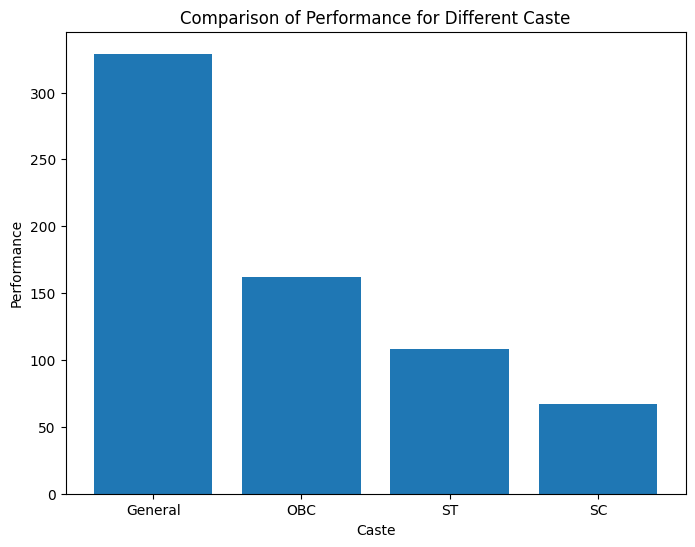

In [17]:
caste_counts = df['Caste'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(caste_counts.index, caste_counts.values)
plt.title('Comparison of Performance for Different Caste')
plt.xlabel('Caste')
plt.ylabel('Performance')

plt.show()

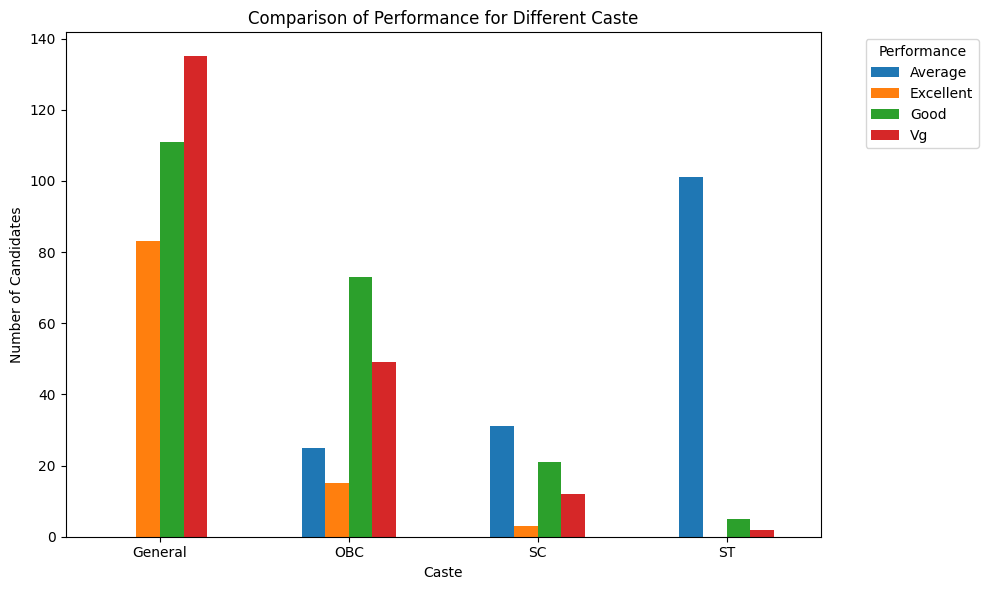

In [21]:
performance_by_caste = pd.crosstab(df['Caste'], df['Performance'])

performance_by_caste.plot(kind='bar', figsize=(10,6))

plt.title('Comparison of Performance for Different Caste')
plt.xlabel('Caste')
plt.ylabel('Number of Candidates')

plt.xticks(rotation=0)
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Data prepare

In [27]:
from sklearn.preprocessing import LabelEncoder
performance_mapping = {'Excellent': 3, 'Vg': 2, 'Good': 1, 'Average': 0}
df['Performance'] = df['Performance'].map(performance_mapping)
df['Class_X_Percentage'] = df['Class_X_Percentage'].map(performance_mapping)
df['Class_XII_Percentage'] = df['Class_XII_Percentage'].map(performance_mapping)

In [28]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['coaching'] = label_encoder.fit_transform(df['coaching'])

df['time'] = label_encoder.fit_transform(df['time'])

In [30]:
df = pd.get_dummies(df, columns=['Caste', 'Class_ten_education', 'twelve_education', 'medium', 'Father_occupation', 'Mother_occupation'])

In [33]:
df.head()

,Gender,coaching,Class_X_Percentage,Class_XII_Percentage,time,Performance,Caste_General,Caste_OBC,Caste_SC,Caste_ST,...,Father_occupation_SCHOOL_TEACHER,Mother_occupation_BANK_OFFICIAL,Mother_occupation_BUSINESS,Mother_occupation_COLLEGE_TEACHER,Mother_occupation_CULTIVATOR,Mother_occupation_DOCTOR,Mother_occupation_ENGINEER,Mother_occupation_HOUSE_WIFE,Mother_occupation_OTHERS,Mother_occupation_SCHOOL_TEACHER
0,1,0,3,3,2,3,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,2,3,3,5,3,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
2,1,1,3,3,5,3,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,2,3,3,2,3,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,1,1,3,3,5,3,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [34]:
X = df.drop(columns=['Performance'])
y = df['Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# RandomForest Classifier 

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.3880597014925373


# PP nhieu model

In [48]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix    

In [49]:
def bar_labels(axes, rotation=0, location='edge'):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_ylabel("")
    axes.set_xlabel("")
    axes.set_yticklabels(())

def training_classification():
    rfc = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    etc = ExtraTreesClassifier()
    svc = SVC()
    lgr = LogisticRegression()
    xgbc = XGBClassifier()
    lgbc = LGBMClassifier(verbose=-100)

    models_cl = [rfc, abc, gbc, etc, lgr, svc, xgbc, lgbc]

    names_cl = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
                   "Logistic Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

    scores, reports, cms = [], dict(), dict()

    for i, j in zip(models_cl, names_cl):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)

    fig, axes = plt.subplots()
    dd = pd.DataFrame({"score": scores}, index=names_cl)
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    dd["score"].plot(kind="bar", ax=axes)
    bar_labels(axes)
    plt.tight_layout()
    plt.show()

    index = 0

    for _ in range(2):
        fig, axes = plt.subplots(ncols=4, figsize=(15,6))
        for i in range(4):
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()

    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])

        print("\n\n")

In [41]:
df = pd.read_csv("/kaggle/input/student-performance-on-an-entrance-examination/Student_Performance_on_an_Entrance_Examination.csv")

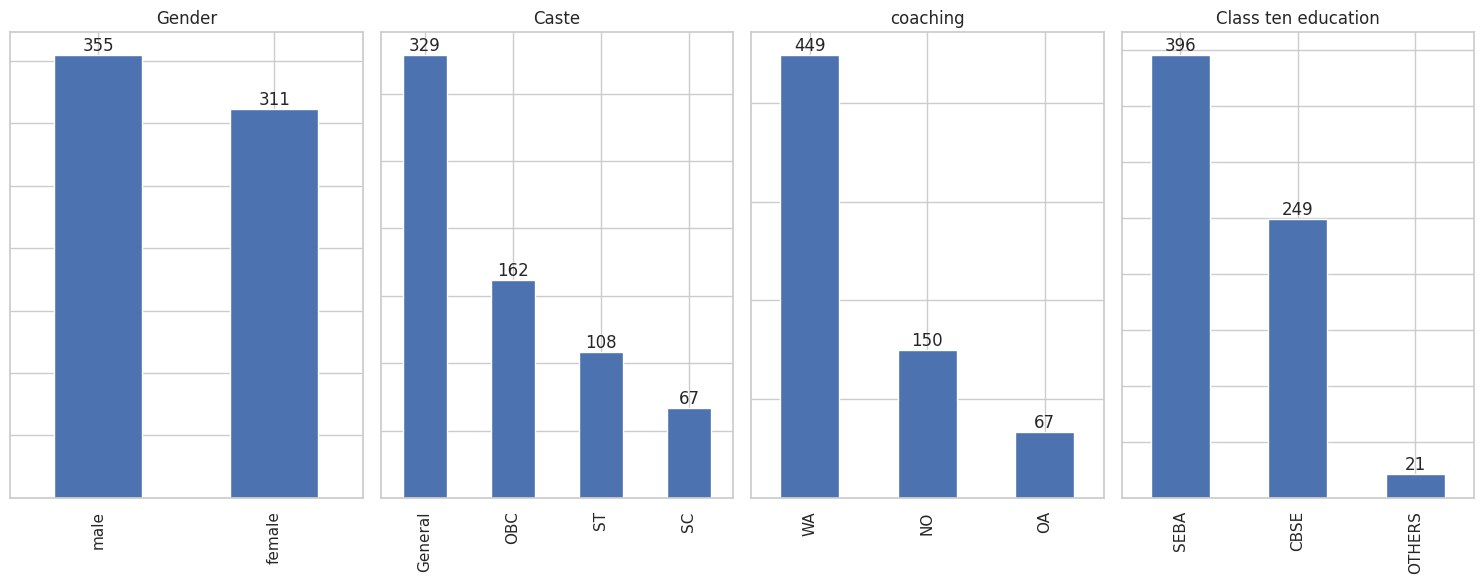

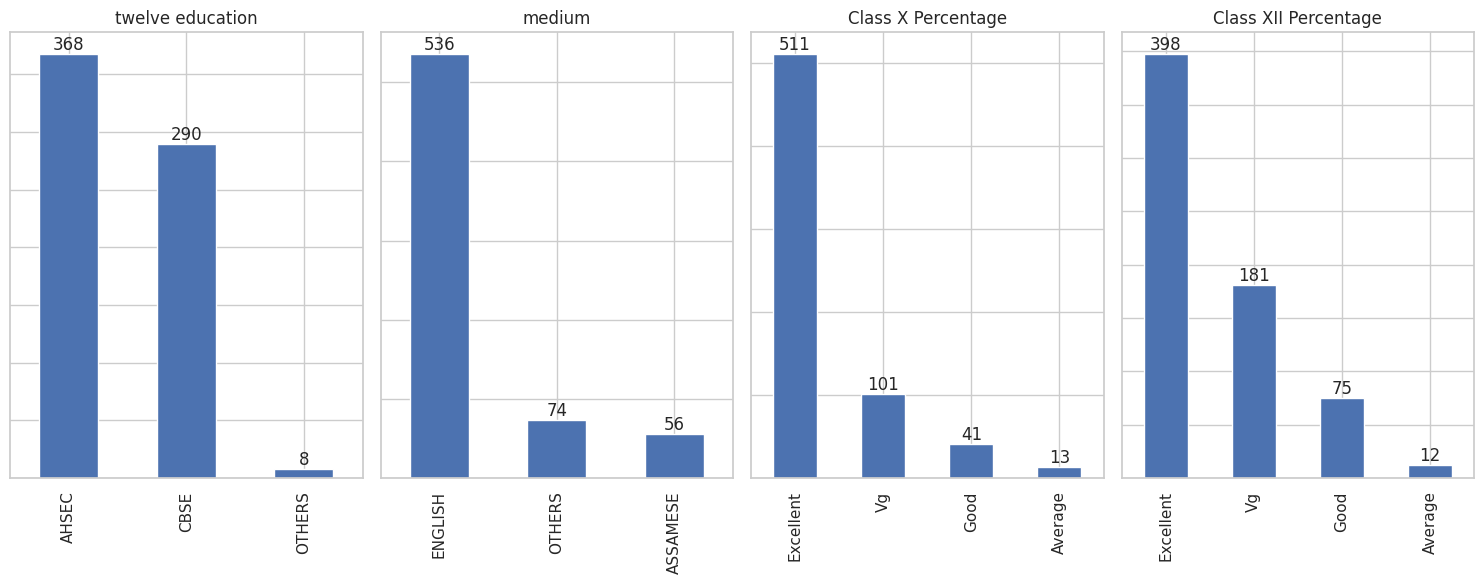

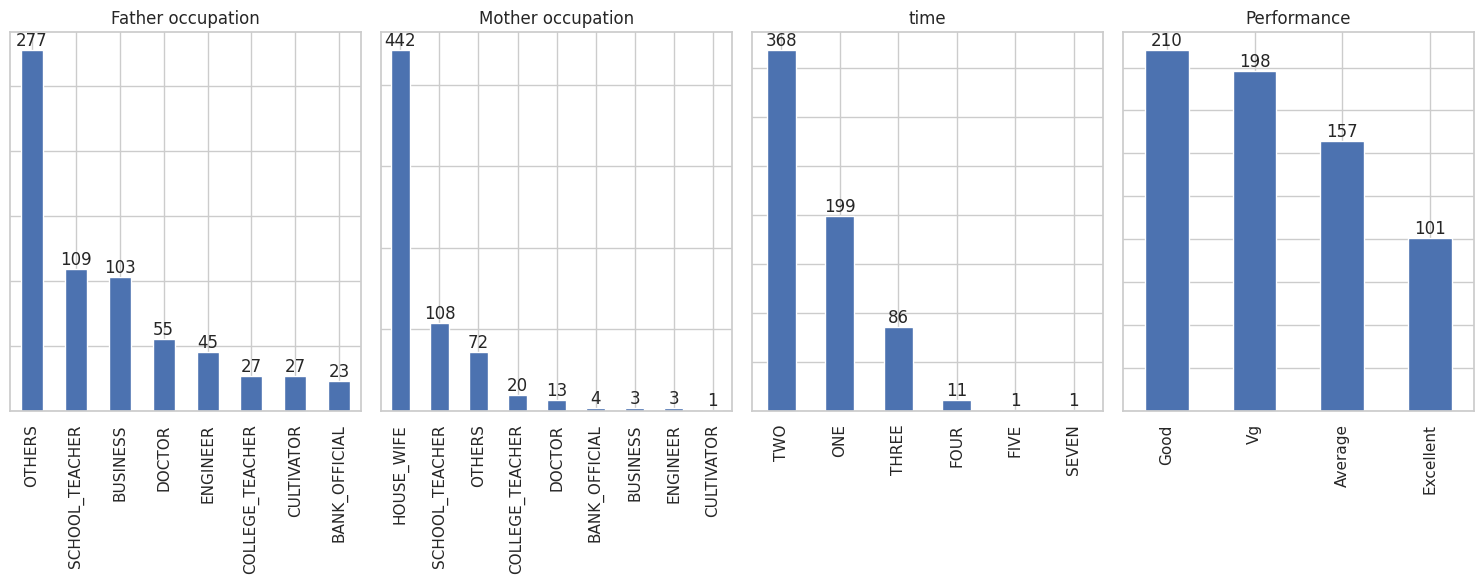

In [42]:
index = 0
cats = df.columns

for _ in range(3):
    fig, axes = plt.subplots(ncols=4, figsize=(15,6))
    for i in range(4):
        df[cats[index]].value_counts().plot(kind="bar", ax=axes[i])
        bar_labels(axes[i])
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

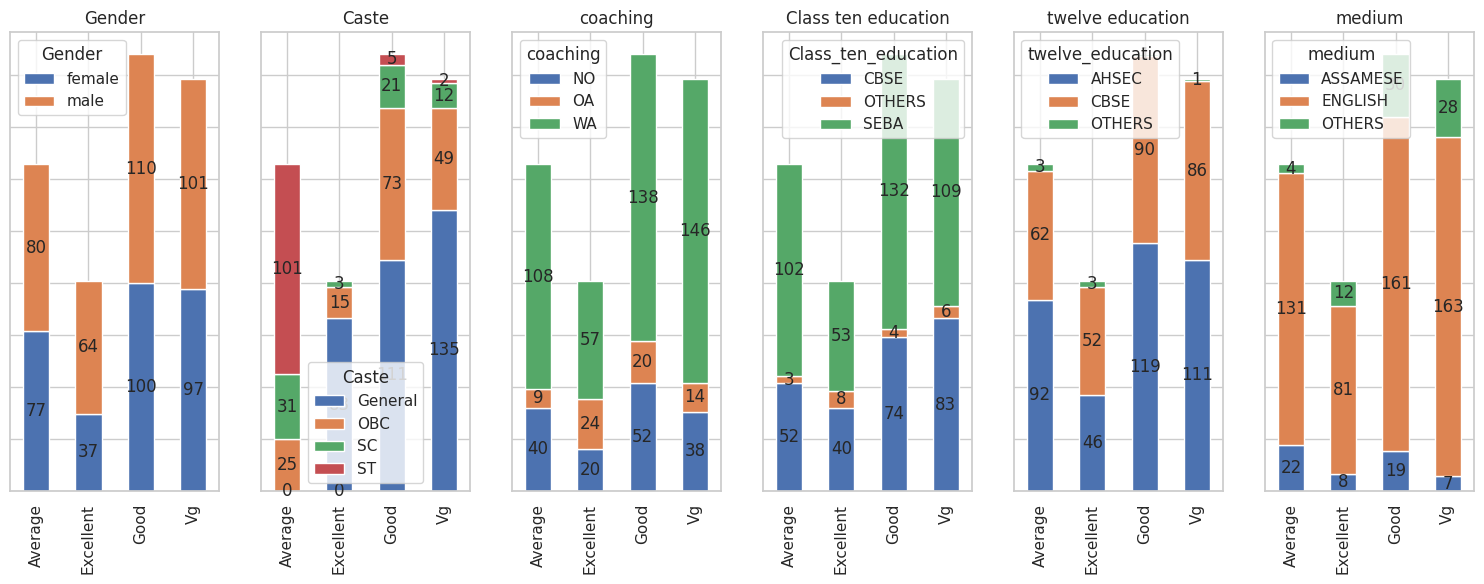

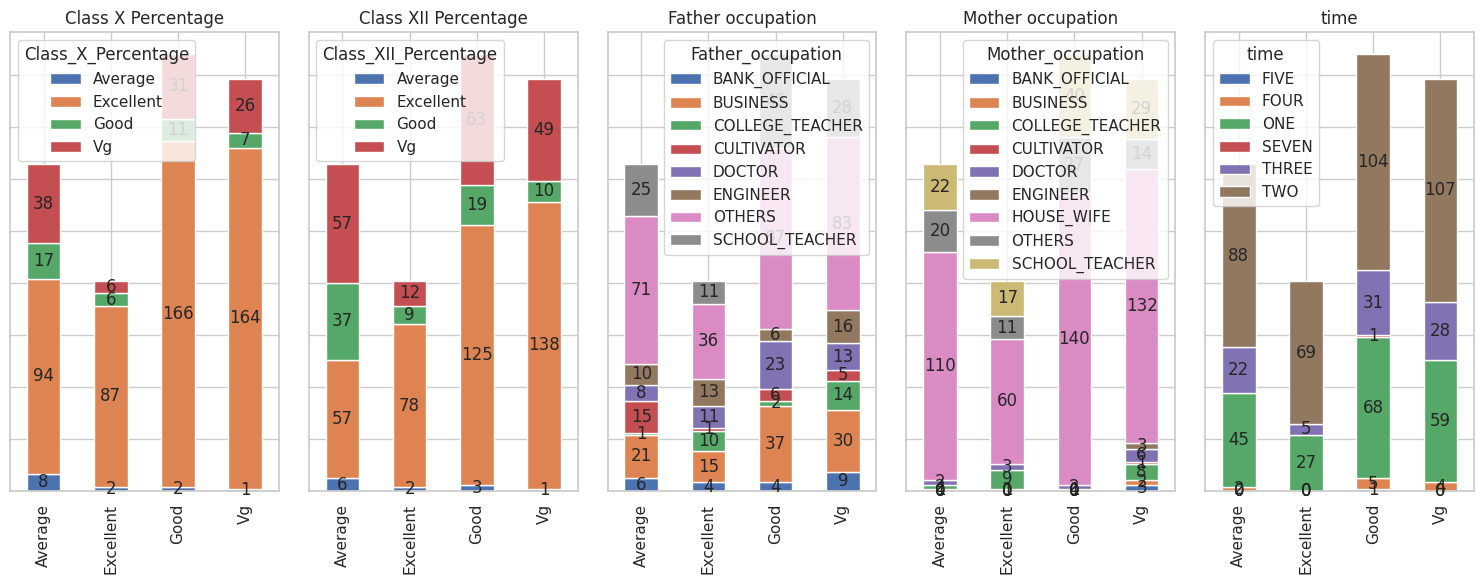

In [43]:
grouped = df.groupby(cats[-1])

index = 0

for j in [6,5]:
    fig, axes = plt.subplots(ncols=j, figsize=(15,6))
    for i in range(j):
        grouped[cats[index]].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
        bar_labels(axes[i], 0, "center")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1

    plt.tight_layout()
    plt.show()

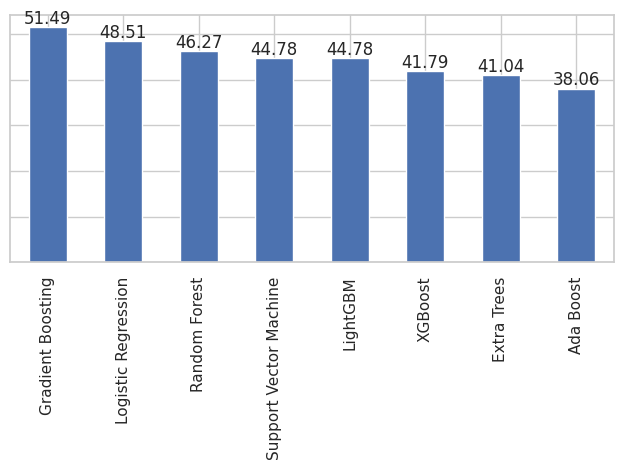

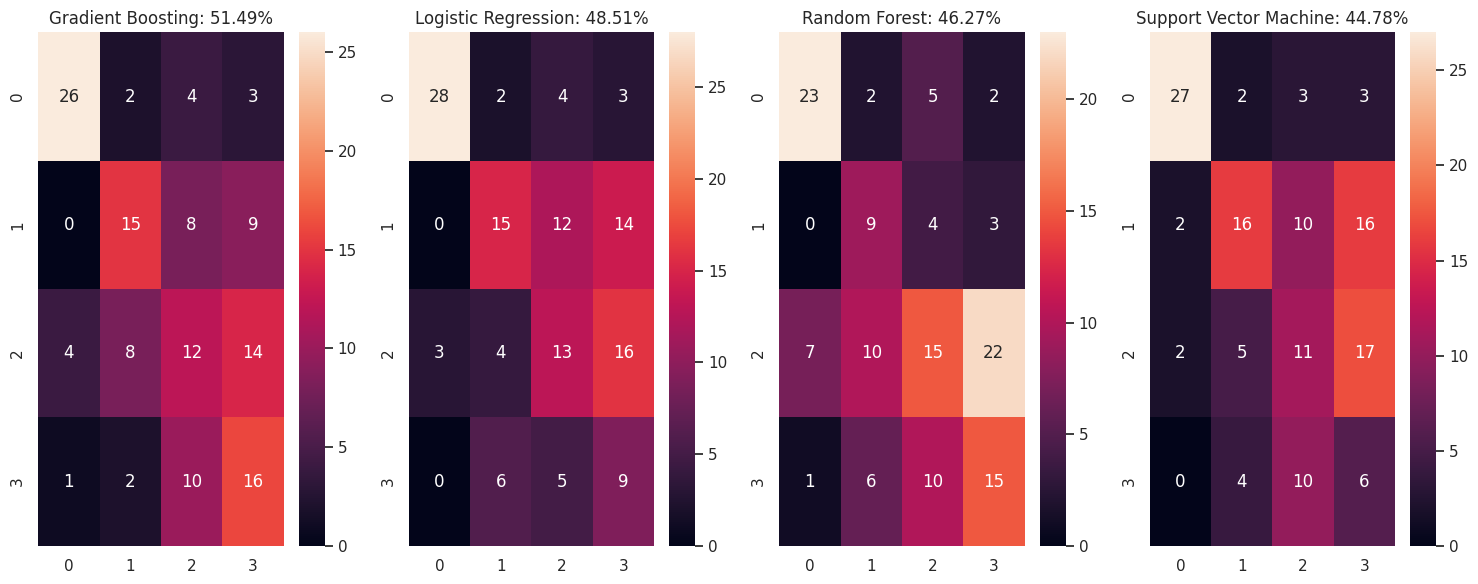

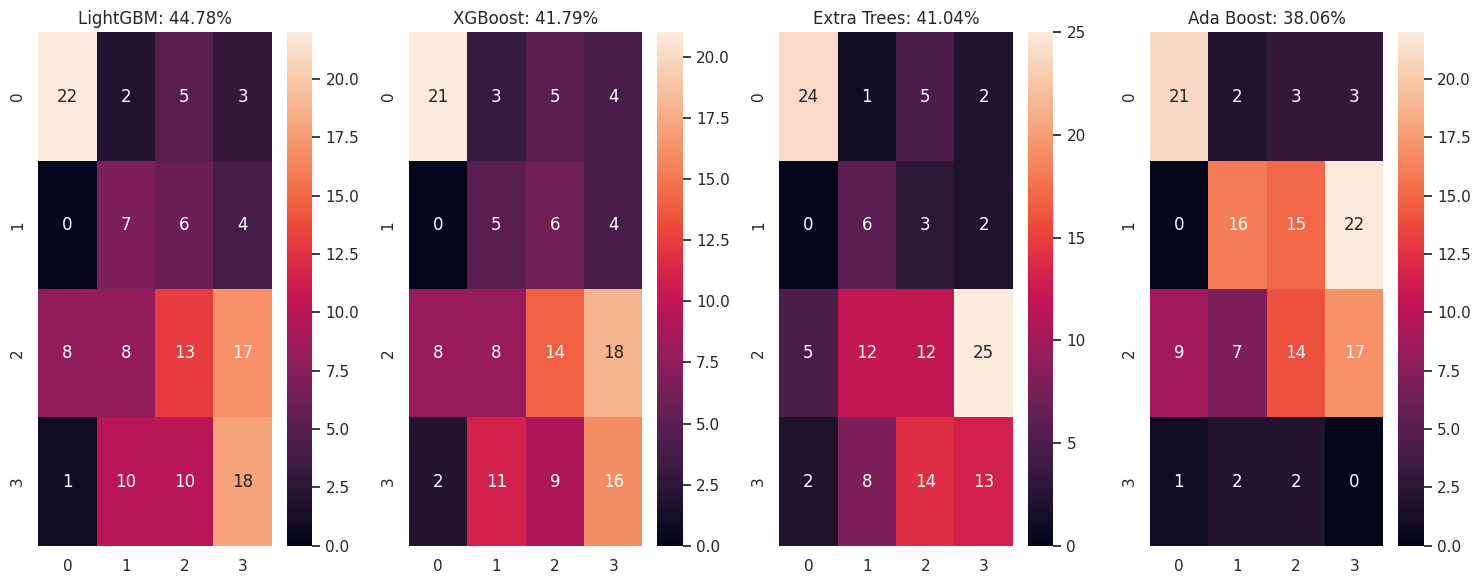

******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.56      0.47      0.51        32
           2       0.35      0.32      0.33        38
           3       0.38      0.55      0.45        29

    accuracy                           0.51       134
   macro avg       0.53      0.52      0.52       134
weighted avg       0.53      0.51      0.52       134




******************************
Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        37
           1       0.56      0.37      0.44        41
           2       0.38      0.36      0.37        36
           3       0.21      0.45      0.29        20

    accuracy                           0.49       134
   macro avg       0.51      0.48      0.48       134
weighted avg       0.55      0.49      0.51       134




************************

In [50]:
for i in df.columns:
    df[i] = LabelEncoder().fit_transform(df[i].values)


x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

x_train, y_train = SMOTE().fit_resample(x_train, y_train)

training_classification()